### Question: How can you efficiently calculate the correlation matrix of a large dataset and visualize it, highlighting highly correlated features?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Generate a large sample dataset
np.random.seed(42)
data = pd.DataFrame({
    'Feature_1': np.random.rand(1000),
    'Feature_2': np.random.rand(1000) * 0.5,
    'Feature_3': np.random.rand(1000) + 0.8,
    'Feature_4': np.random.rand(1000) * 2,
    'Feature_5': np.random.rand(1000) * 1.2
})

In [3]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Mask to highlight only upper triangle (optional for cleaner plots)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

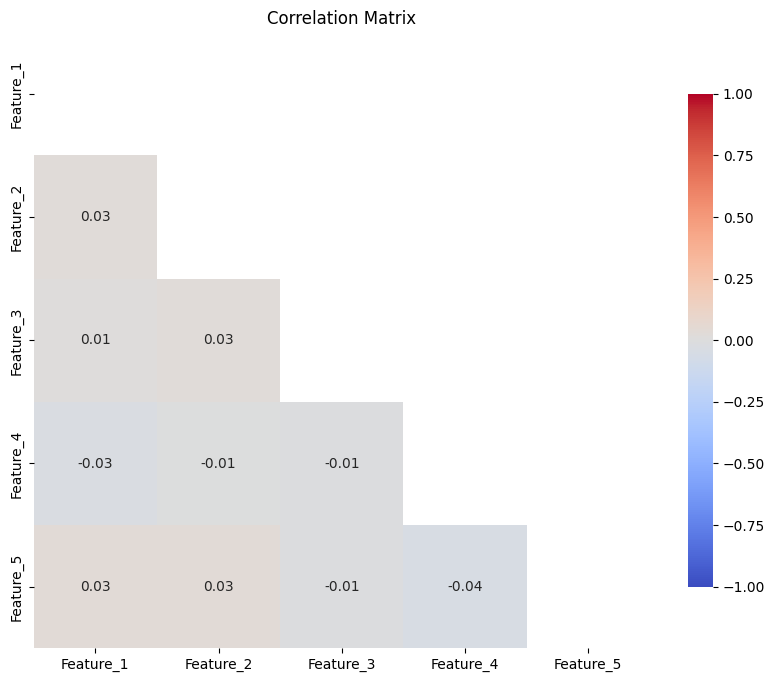

In [4]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    mask=mask, 
    cmap='coolwarm', 
    vmin=-1, 
    vmax=1, 
    square=True, 
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Matrix")
plt.show()

In [5]:
# Identify highly correlated features
threshold = 0.8
high_corr = correlation_matrix.where(np.abs(correlation_matrix) > threshold).stack().reset_index()
high_corr = high_corr[high_corr['level_0'] != high_corr['level_1']]  # Remove self-correlations
print("Highly correlated feature pairs (threshold > 0.8):\n", high_corr)

Highly correlated feature pairs (threshold > 0.8):
 Empty DataFrame
Columns: [level_0, level_1, 0]
Index: []
